# Taxi-v2

Import needed dependencies

In [1]:
import gym
import torch
import training
import benchmark

In [2]:
ENV = 'Taxi-v2'

## Interaction with the environment
Explore the environment to understand its dynamics, observations and actions.

In [3]:
test_env = gym.make(ENV)
state = test_env.reset()
print(f'Observation space: {test_env.observation_space}')
print(f'Observation space sample: {test_env.observation_space.sample()}')

print(f'Action space: {test_env.action_space}')
print(f'Action space sample: {test_env.action_space.sample()}')

print(f'State: {state}')
test_env.render()

Observation space: Discrete(500)
Observation space sample: 111
Action space: Discrete(6)
Action space sample: 0
State: 186
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Play random action and see how it affects the environment

In [4]:
random_action = test_env.action_space.sample()
new_state, reward, done, _ = test_env.step(random_action)

print(f'Action: {random_action}\tNew state: {new_state}\tReward: {reward}\tDone:{done}')
test_env.render()

Action: 3	New state: 166	Reward: -1	Done:False
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


## Solving the environment using Q-Learning

In [5]:
env = gym.make(ENV)

q_table = torch.zeros((env.observation_space.n, env.action_space.n))
best_score, q_table = training.fit(env, q_table, episodes=10_000)
rewards = benchmark.play_episodes(env, q_table, episodes=100)

mean_reward = rewards.mean().item()
print(f'Mean reward: {mean_reward}')

Episode 2000: New best score! 8.800000190734863
Episode 4000: New best score! 8.989999771118164
Episode 10000: New best score! 9.0600004196167
Mean reward: 8.699999809265137


In [6]:
benchmark.play_episodes(env, q_table, render=True)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |

tensor([5.])

Save q-table to file

In [7]:
torch.save(q_table, 'Taxi-v2_saved/Taxi-v2-qtable.pt')

## Q-Table plot
Plotting the Q-Table shows clearly that the actions 4 an 5 which correspond to pickup and dropoff are of the most value.
This is to be expected since performing those actions correctly will return a reward of +10.

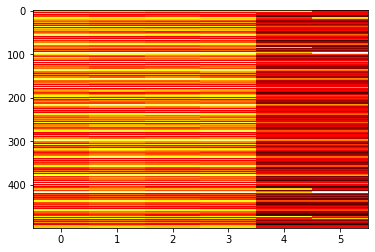

In [9]:
import matplotlib.pyplot as plt

plt.imshow(q_table, cmap='hot', aspect='auto')